# Quick Look

Created on: May 4th, 2022 \
Author: Johnny Esteves

## Data: Feb 17th 2022

In [1]:
obsDate = '20220217'

In [7]:
int(obsDate)*10**5+1

2022021700001

### PTC dataset

In [64]:
import lsst.daf.butler as dB

butler = dB.Butler("/repo/main", collections=[f"u/jesteves/comcam/ptc_{obsDate}"])
detector = (0, 1, 2, 3, 4, 5, 6, 7, 8)
exposure = [int(obsDate)*10**5+200, int(obsDate)*10**5+201] # e.g., [2021071500001, 2021071500002]

# For detector "0":
ptc = butler.get('ptc', detector=detector[0], exposure=exposure[0], instrument='LSSTComCam')

In [36]:
out = ptc.toDict()

In [37]:
print(out.keys())

dict_keys(['metadata', 'ptcFitType', 'covMatrixSide', 'ampNames', 'badAmps', 'inputExpIdPairs', 'expIdMask', 'rawExpTimes', 'rawMeans', 'rawVars', 'gain', 'gainErr', 'noise', 'noiseErr', 'ptcFitPars', 'ptcFitParsError', 'ptcFitChiSq', 'covariances', 'covariancesModel', 'covariancesSqrtWeights', 'aMatrix', 'bMatrix', 'covariancesModelNoB', 'aMatrixNoB', 'finalVars', 'finalModelVars', 'finalMeans', 'photoCharge'])


In [42]:
ptc._metadata.toDict()

{'OBSTYPE': 'PTC',
 'PTC_SCHEMA': 'Gen3 Photon Transfer Curve',
 'PTC_VERSION': 1.0,
 'INSTRUME': 'LSSTComCam',
 'RAFTNAME': None,
 'SLOTNAME': None,
 'DETECTOR': None,
 'DET_NAME': None,
 'DET_SER': None,
 'FILTER': None,
 'CALIB_ID': None,
 'CALIBCLS': 'lsst.ip.isr.ptcDataset.PhotonTransferCurveDataset',
 'PTC_FIT_TYPE': 'EXPAPPROXIMATION',
 'CALIBDATE': '2022-05-04T10:11:49.347840',
 'CALIB_CREATION_DATE': '2022-05-04',
 'CALIB_CREATION_TIME': '10:11:49.347840'}

In [20]:
ptc.ptcFitPars

{'C00': [-1.5825600646857918e-06, 1.5934890436841647, 358.59952771064553],
 'C01': [-1.659999593995506e-06, 1.5939180571943952, 278.965850105785],
 'C02': [-1.9773047126151596e-06, 1.5724898175894573, 58.313541671249894],
 'C03': [-1.5459600864942443e-06, 1.6292036901670595, 431.3667370059667],
 'C04': [-1.5496379054556105e-06, 1.6309847534205324, 351.41400621749756],
 'C05': [-1.4404395567641577e-06, 1.649331503417277, 384.16091442984606],
 'C06': [-1.346088431911332e-06, 1.681415564343416, 549.2523229905861],
 'C07': [-9.470982212815021e-07, 1.7499328898551518, 982.1101340248862],
 'C10': [-1.2952625267061025e-06, 1.6425453189696055, 512.337279834549],
 'C11': [-1.3014299983750424e-06, 1.646317043459625, 485.8967243141889],
 'C12': [-1.32696427403262e-06, 1.6528902006733668, 549.4527113639044],
 'C13': [-1.2028434214936474e-06, 1.6808673431576897, 706.0566253805088],
 'C14': [-1.2028229451222477e-06, 1.696130485066349, 827.6536622555566],
 'C15': [-1.5831933148503008e-06, 1.628618464

In [31]:
ptc.gain

{'C00': 1.5934890436841647,
 'C01': 1.5939180571943952,
 'C02': 1.5724898175894573,
 'C03': 1.6292036901670595,
 'C04': 1.6309847534205324,
 'C05': 1.649331503417277,
 'C06': 1.681415564343416,
 'C07': 1.7499328898551518,
 'C10': 1.6425453189696055,
 'C11': 1.646317043459625,
 'C12': 1.6528902006733668,
 'C13': 1.6808673431576897,
 'C14': 1.696130485066349,
 'C15': 1.6286184647193653,
 'C16': 1.6421582887749258,
 'C17': 1.6859324567485885}

In [47]:
ptc.finalMeans['C00']

[6286.114845107237,
 12578.318263048028,
 18873.710528127922,
 25172.272471328284,
 31473.89262365141,
 37784.798188047396,
 44067.86692905049,
 50345.618442522085,
 56592.22245941781,
 62852.51554137558,
 69144.76425963402,
 75457.30812919704,
 81772.7150042631,
 88091.0917063659,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [48]:
ptc.rawMeans['C00']

[6286.114845107237,
 12578.318263048028,
 18873.710528127922,
 25172.272471328284,
 31473.89262365141,
 37784.798188047396,
 44067.86692905049,
 50345.618442522085,
 56592.22245941781,
 62852.51554137558,
 69144.76425963402,
 75457.30812919704,
 81772.7150042631,
 88091.0917063659,
 94420.03636583153,
 100083.06888351301,
 103803.33972895541,
 105652.56667615316,
 106564.19092816781,
 106836.67438596433]

In [103]:
channels = [f"C{i:02d}" for i in np.array([0,1,2,3,4,5,6,6,7,10,11,12,13,14,15,16,17])]
channels

['C00',
 'C01',
 'C02',
 'C03',
 'C04',
 'C05',
 'C06',
 'C06',
 'C07',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17']

In [196]:
import numpy as np

channels = [f"C{i:02d}" for i in np.array([0,1,2,3,4,5,6,6,7,10,11,12,13,14,15,16,17])]

def get_turnoff(ptc):
    res = []
    flag = []
    for ci in channels:
        means = np.array(ptc.finalMeans[ci])
        gi = float(ptc.gain[ci])
        isnan = np.isnan(means)
        if np.count_nonzero(~isnan)>0:
            res.append(gi*means[~isnan][-1]*1e-3)
            flag.append(False)
        else:
            res.append(np.nan)
            flag.append(True)
    return np.array(res), np.array(flag)

## Development: PTC Turnoff Code

In [197]:
# the aim here is to store the ptc turnoff mean value for the 16 channels and the 9 detectors

In [198]:
import lsst.daf.butler as dB

butler = dB.Butler("/repo/main", collections=[f"u/jesteves/comcam/ptc_{obsDate}"])
detector = (0, 1, 2, 3, 4, 5, 6, 7, 8)
sensors = ("S00","S01","S02","S10","S11","S12","S20","S21","S22")

exposure = [int(obsDate)*10**5+200, int(obsDate)*10**5+201] # e.g., [2021071500001, 2021071500002]

turnoffs = dict().fromkeys(sensors)
for i,Sii in zip(detector,sensors):
    print(f'Sensor R22 {Sii}, detector {i}')
    ptc = butler.get('ptc', detector=i, exposure=exposure[0], instrument='LSSTComCam')
    vals, flag = get_turnoff(ptc)
    turnoffs[Sii] = vals
    turnoffs[Sii+'_flag'] = flag

Sensor R22 S00, detector 0
Sensor R22 S01, detector 1
Sensor R22 S02, detector 2
Sensor R22 S10, detector 3
Sensor R22 S11, detector 4
Sensor R22 S12, detector 5
Sensor R22 S20, detector 6
Sensor R22 S21, detector 7
Sensor R22 S22, detector 8


### Plot PTC turnoff 

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

In [201]:
turnoffs_matrix = np.full((len(sensors),len(channels)), np.nan)
for i,Sii in zip(detector,sensors):
    turnoffs_matrix[i] = turnoffs[Sii]

In [204]:
markers = ['D','o','v','^','<','>','s','P','X']

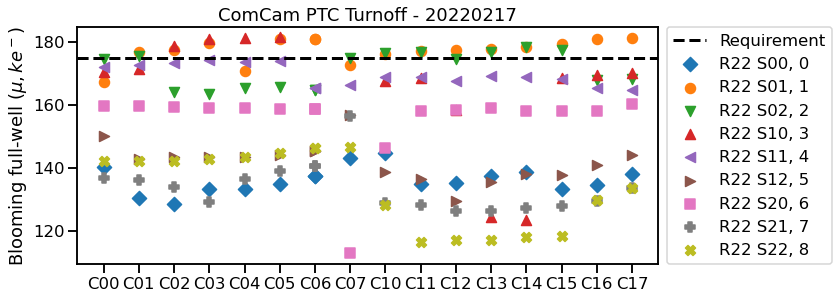

In [209]:
plt.figure(figsize=(12,4.5))
for i,Sii in zip(detector,sensors):
    plt.scatter(channels,turnoffs[Sii],s=100,marker=markers[i],label=f'R22 {Sii}, {i}')

plt.axhline(175,color='k',ls='--',lw=3,label='Requirement')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(r'Blooming full-well ($\mu, ke^-$)',fontsize=18)
plt.title(f'ComCam PTC Turnoff - {obsDate}')
plt.tight_layout()
plt.savefig(f'blooming_full_well_channels_{obsDate}.png',dpi=100,facecolor='w',transparent=False)

Text(0.5, 1.0, 'ComCam PTC Turnoff - 20220217')

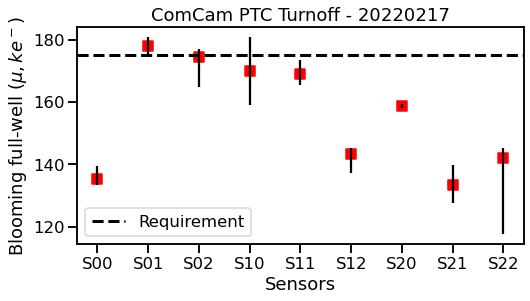

In [210]:
mean_sensors = np.nanmedian(turnoffs_matrix, axis=1)
p16_sensors = mean_sensors-np.nanpercentile(turnoffs_matrix, 16, axis=1)
p84_sensors = np.nanpercentile(turnoffs_matrix, 84, axis=1)-mean_sensors

plt.figure(figsize=(8,4))
plt.errorbar(sensors,mean_sensors,yerr=[p16_sensors,p84_sensors],ls='None',color='k')
plt.scatter(sensors,mean_sensors,s=100,marker='s',color='r')

plt.axhline(175,color='k',ls='--',lw=3,label='Requirement')
plt.legend()
plt.ylabel(r'Blooming full-well ($\mu, ke^-$)',fontsize=18)

plt.xlabel(r'Sensors',fontsize=18)
plt.title(f'ComCam PTC Turnoff - {obsDate}')

Text(0.5, 1.0, 'ComCam PTC Turnoff - 20220217')

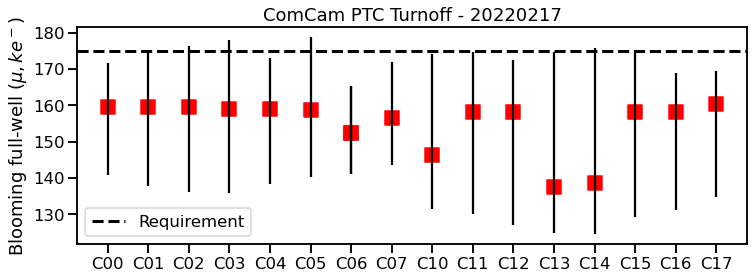

In [211]:
mean_channels = np.nanmedian(turnoffs_matrix, axis=0)
p16_channels = mean_channels-np.nanpercentile(turnoffs_matrix, 16, axis=0)
p84_channels = np.nanpercentile(turnoffs_matrix, 84, axis=0)-mean_channels
plt.figure(figsize=(12,4))
plt.errorbar(channels,mean_channels,yerr=[p16_channels,p84_channels],ls='None',color='k')
plt.scatter(channels,mean_channels,s=200,marker='s',color='r')
plt.axhline(175,color='k',ls='--',lw=3,label='Requirement')
plt.legend()
plt.ylabel(r'Blooming full-well ($\mu, ke^-$)',fontsize=18)
plt.title(f'ComCam PTC Turnoff - {obsDate}')